In [44]:
import json
with open('font-exp-default-rtdb-export.json', mode='r') as file:
    data = json.load(file)['users']

In [47]:
result = {'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':0}

for user in data:
    f = 1
    data1 = data[user]
    '''
    for v in data1['concentration']:
        if not(v['bestValue'] == '1' and v['worstValue'] == '2'):
            f = 0
            break
    '''
    if f == 1:
        for v in data1['results']:
            result[v['bestValue']] +=1
            result[v['worstValue']] -=1

In [48]:
result

{'1': -41, '2': -55, '3': 0, '4': 30, '5': -7, '6': 56, '7': 17}

<BarContainer object of 7 artists>

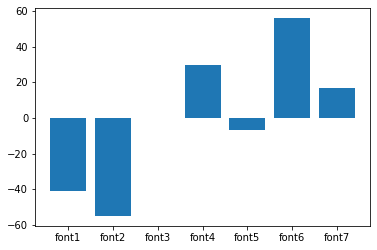

In [69]:
import matplotlib.pyplot as plt
left = [int(v) for v in result]
height = [int(result[v]) for v in result]
label = ["font" + v for v in result]
plt.bar(left, height, tick_label=label)

In [53]:
result_sorted = sorted(result.items(), key = lambda font : font[1])
result_sorted

[('2', -55), ('1', -41), ('5', -7), ('3', 0), ('7', 17), ('4', 30), ('6', 56)]

<BarContainer object of 7 artists>

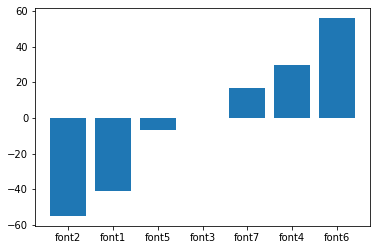

In [71]:
import matplotlib.pyplot as plt
height = [int(v[1]) for v in result_sorted]
label = ["font" + v[0] for v in result_sorted]
plt.bar(left, height, tick_label=label)